In [1]:
import numpy as np
from pathlib import Path
from PIL import Image

In [2]:
import time
from tqdm.auto import tqdm
import plotly.express as px
from random import choices

In [3]:
from scipy import ndimage
import math

In [4]:
DATA_DIR = Path('./dataset/')

In [14]:
tile_dataset = moire_images = DATA_DIR / 'train'

In [15]:
moire_images = list((tile_dataset / 'moire').glob('./*.jpg'))

In [7]:
def get_fft( input_img ):
    input = np.float32( input_img )[:,:,0]
    dft = np.fft.fft2(input)
    dft_shift = np.fft.fftshift(dft)
    ft = dft_shift.real

    return ft

In [8]:
def invert_fft( fft_array ):
    ift = np.fft.ifftshift(fft_array)
    ift = np.fft.ifft2(ift)
    ift = np.fft.fftshift(ift)
    ift = ift.real

    return ift

In [130]:
fft = get_fft( Image.open( moire_images[0] ) )
reversed = invert_fft( fft )

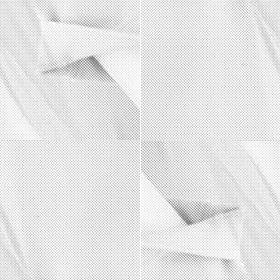

In [140]:
Image.fromarray( reversed.round().astype('uint8') )

In [9]:
def limit_frequencies( fft, inner_limit=0, outer_limit=140 ):
    center = (fft.shape[1] / 2, fft.shape[0] / 2)
    for y in range(fft.shape[0]):
        for x in range(fft.shape[1]):
            r = math.sqrt( abs(center[0] - x) ** 2 + abs(center[1] - y) ** 2 )
            if r > outer_limit:
                fft[y,x] = 0
    
            if r < inner_limit:
                fft[y,x] = 0

    return fft

In [10]:
0 / 0

ZeroDivisionError: division by zero

# Heatmap errechnen

In [26]:
selected_moires = choices(moire_images, k=50)

In [49]:
heatmap = np.zeros((280,280))

for moire_path in tqdm(selected_moires):
    non_moire_path = tile_dataset / 'no_moire' / moire_path.name

    moire_img = Image.open( moire_path )
    no_moire_img = Image.open( non_moire_path )

    moire_fft = get_fft( moire_img )
    moire_fft = ndimage.uniform_filter( moire_fft , size=20)
    moire_fft = limit_frequencies( moire_fft, inner_limit=25, outer_limit=120)

    no_moire_fft = get_fft( no_moire_img )
    no_moire_fft = ndimage.uniform_filter( no_moire_fft , size=20)
    no_moire_fft = limit_frequencies( no_moire_fft, inner_limit=25, outer_limit=120)
  
    diff_fft = np.absolute(moire_fft - no_moire_fft)
    heatmap += diff_fft

  0%|          | 0/50 [00:00<?, ?it/s]

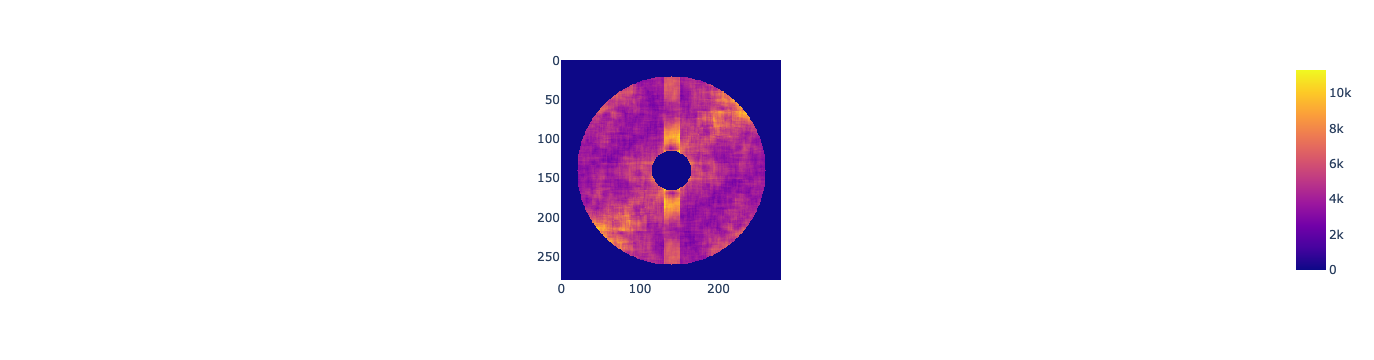

In [50]:
px.imshow(heatmap)

In [47]:
heatmap = np.zeros((280,280))

for moire_path in tqdm(selected_moires):
    moire_img = Image.open( moire_path )
    moire_fft = get_fft( moire_img )
    #moire_fft[139:142,139:142] = 0
    moire_fft = limit_frequencies( moire_fft, inner_limit=25, outer_limit=120)

    moire_fft = ndimage.uniform_filter( moire_fft , size=10)
    
    heatmap += np.absolute(moire_fft)

  0%|          | 0/50 [00:00<?, ?it/s]

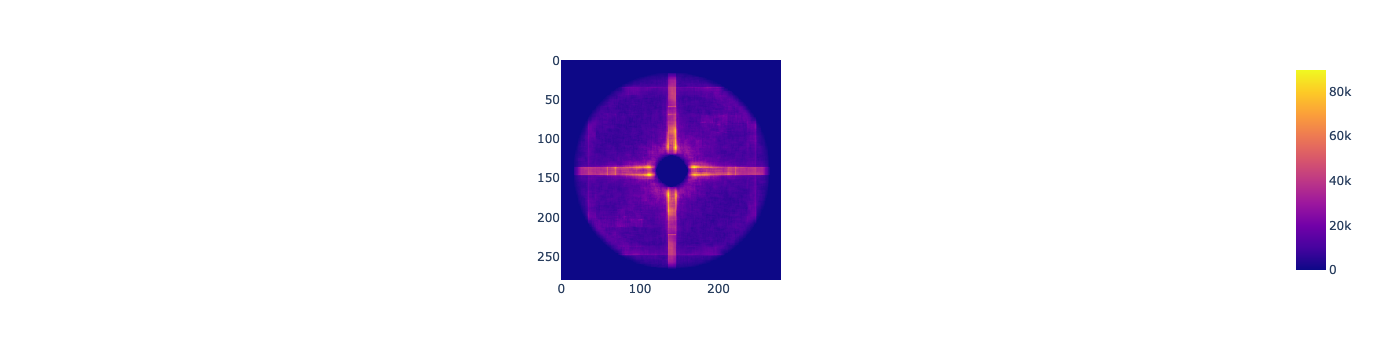

In [48]:
px.imshow(heatmap)

# Rest

In [125]:
i = 19

moire_path = selected_moires[i]

non_moire_path = tile_dataset / 'no_moire' / moire_path.name

moire_img = Image.open( moire_path )
no_moire_img = Image.open( non_moire_path )

moire_fft = get_fft( moire_img )
#moire_fft = ndimage.uniform_filter( moire_fft , size=15)
moire_fft = limit_frequencies( moire_fft, inner_limit=25, outer_limit=125)

no_moire_fft = get_fft( no_moire_img )
#no_moire_fft = ndimage.uniform_filter( no_moire_fft , size=20)
no_moire_fft = limit_frequencies( no_moire_fft, inner_limit=15, outer_limit=125)

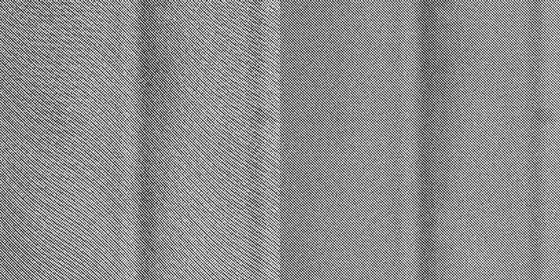

In [126]:
moire_img = Image.open( moire_path )
no_moire_img = Image.open( non_moire_path )

display_img = Image.new('RGB', ( moire_img.size[0] * 2, moire_img.size[1] ))
display_img.paste(moire_img, (0,0))
display_img.paste(no_moire_img, (moire_img.size[0],0))

display_img

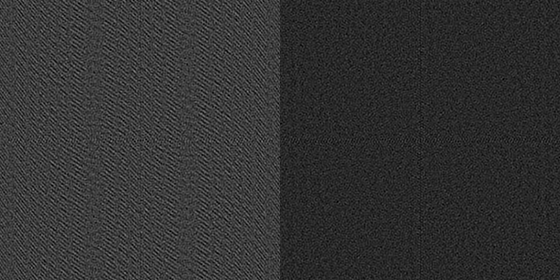

In [127]:
iv = invert_fft(moire_fft)
iv -= iv.min()

moire_iv = Image.fromarray(iv.round().astype('uint8'))

iv = invert_fft(no_moire_fft)
iv -= iv.min()

no_moire_iv = Image.fromarray(iv.round().astype('uint8'))

display_iv_img = Image.new('RGB', ( moire_img.size[0] * 2, moire_img.size[1] ))
display_iv_img.paste(moire_iv, (0,0))
display_iv_img.paste(no_moire_iv, (moire_img.size[0],0))

display_iv_img